In [93]:
# KNN & SVM models

In [94]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# Load data
df = pd.read_csv("kbopitchingdata.csv")

columns_to_keep = [
    'ERA', 'WHIP', 'strikeouts', 'complete_game', 'shutouts', 'saves',
    'innings_pitched', 'hits', 'runs', 'earned_runs', 'home_runs', 'walks', 'win_loss_percentage'
]

df = df[columns_to_keep]
df

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.19,1.260,318,32,4,10,725.1,625,318,257,41,289,0.700
319,3.51,1.298,394,19,8,15,708.1,660,350,276,52,259,0.582
320,3.95,1.435,363,26,4,4,713.2,763,385,313,69,261,0.388
321,3.76,1.403,348,24,2,3,707.9,698,388,296,50,295,0.475


In [96]:
# Identify missing values
df.replace("?", np.nan, inplace = True)
df.dropna(axis=0, inplace=True)
missing_values = df.isna().sum()
print(missing_values)
df

ERA                    0
WHIP                   0
strikeouts             0
complete_game          0
shutouts               0
saves                  0
innings_pitched        0
hits                   0
runs                   0
earned_runs            0
home_runs              0
walks                  0
win_loss_percentage    0
dtype: int64


,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.19,1.260,318,32,4,10,725.1,625,318,257,41,289,0.700
319,3.51,1.298,394,19,8,15,708.1,660,350,276,52,259,0.582
320,3.95,1.435,363,26,4,4,713.2,763,385,313,69,261,0.388
321,3.76,1.403,348,24,2,3,707.9,698,388,296,50,295,0.475


In [97]:
# splitting the data into features and target variable
X = df.drop(['win_loss_percentage'], axis=1)
y = df['win_loss_percentage'].apply(lambda x: 1 if x >= 0.500 else 0)

# splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
# KNN model

Accuracy for k=3: 0.7319587628865979

Classification Report for k=3:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        45
           1       0.77      0.71      0.74        52

    accuracy                           0.73        97
   macro avg       0.73      0.73      0.73        97
weighted avg       0.74      0.73      0.73        97



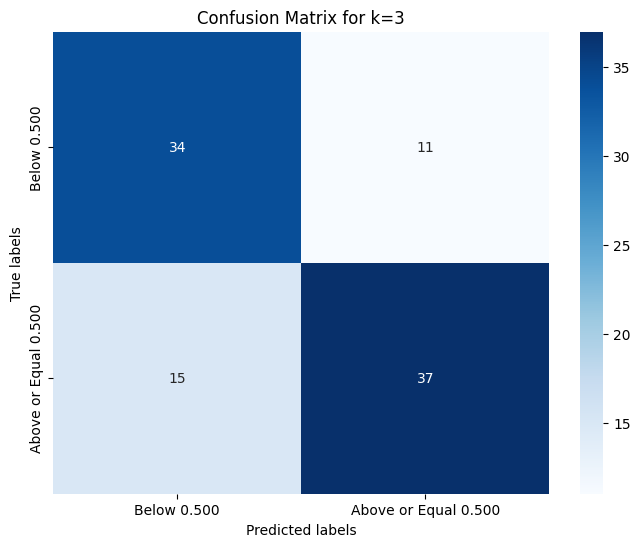


Accuracy for k=5: 0.7525773195876289

Classification Report for k=5:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        45
           1       0.79      0.73      0.76        52

    accuracy                           0.75        97
   macro avg       0.75      0.75      0.75        97
weighted avg       0.76      0.75      0.75        97



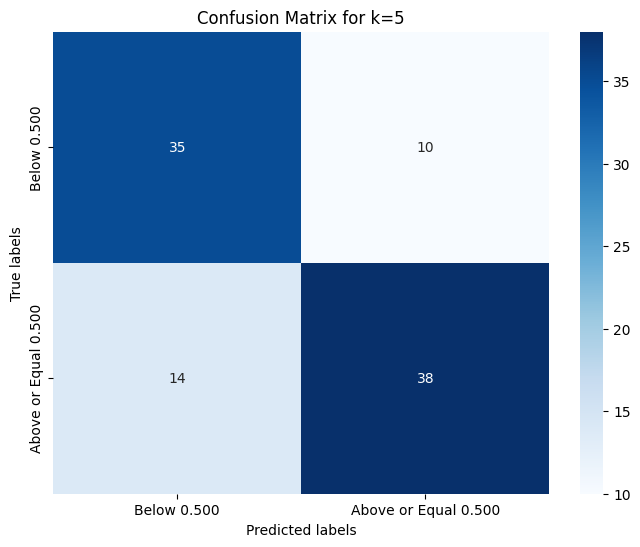


Accuracy for k=10: 0.7216494845360825

Classification Report for k=10:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73        45
           1       0.80      0.63      0.71        52

    accuracy                           0.72        97
   macro avg       0.73      0.73      0.72        97
weighted avg       0.74      0.72      0.72        97



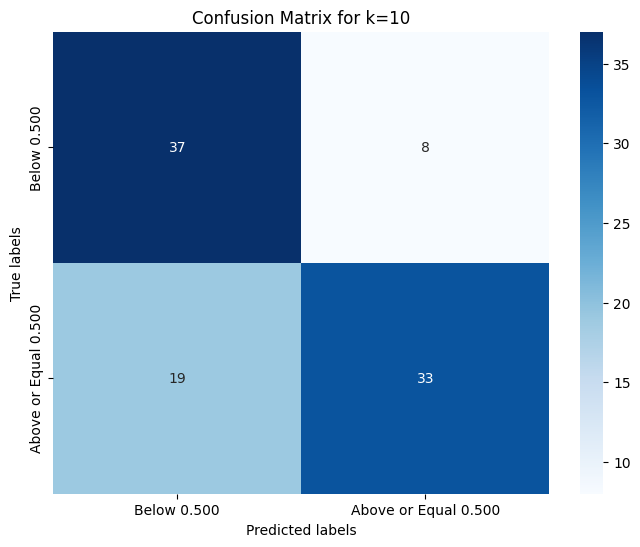

In [99]:
k_values = [3, 5, 10]

# Train and evaluate KNN models for different k values
for k in k_values:
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model
    knn.fit(X_train, y_train)
    # Predict on the test data
    y_pred = knn.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k={k}: {accuracy}')
    print()

    # classification report
    print(f'Classification Report for k={k}:')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    # print(f'Confusion Matrix for k={k}:')
    # print(cm)
    # print()

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for k={k}')
    ax.xaxis.set_ticklabels(['Below 0.500', 'Above or Equal 0.500'])
    ax.yaxis.set_ticklabels(['Below 0.500', 'Above or Equal 0.500'])
    plt.show()
    print()

In [100]:
# SVM model

Accuracy: 0.7422680412371134

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        45
           1       0.80      0.69      0.74        52

    accuracy                           0.74        97
   macro avg       0.75      0.75      0.74        97
weighted avg       0.75      0.74      0.74        97



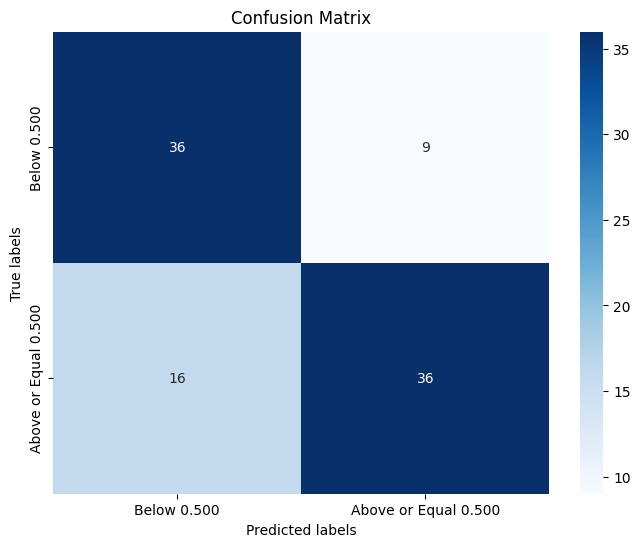

In [101]:
# train the model on the training data
svm = SVC()
svm.fit(X_train, y_train)

# predictions on the test set
y_pred = svm.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print()
# print("Confusion matrix:")
# print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix')
ax.xaxis.set_ticklabels(['Below 0.500', 'Above or Equal 0.500'])
ax.yaxis.set_ticklabels(['Below 0.500', 'Above or Equal 0.500'])
plt.show()